In [55]:
import numpy;
import matplotlib.pyplot as plt;

import tensorflow;
from tensorflow.keras.initializers import TruncatedNormal;
from tensorflow.keras.metrics import MeanSquaredError;

from tqdm import tqdm;

In [76]:
# This will enable Tensorflow's Tensor uses numpy behavior
from tensorflow.python.ops.numpy_ops import np_config;
np_config.enable_numpy_behavior();

In [2]:
# Training data
feature = numpy.array(
    [
        [0.08, 0.72], [0.26, 0.58], [0.45, 0.15], 
        [0.60, 0.30], [0.10, 1.0], [0.35, 0.95], 
        [0.70, 0.65], [0.92, 0.45]
    ]);

label = numpy.array([1, 1, 1, 1, -1, -1, -1, -1]);

In [176]:
class AdalineLMS:

    # Hyperparameters
    def __init__(self, feature, label):
        
        self.learning_rate = 1e-1;
        self.epoch = 200;

        initializer = TruncatedNormal(mean = 0, stddev = 0.05)(shape = (1, 2)).numpy();

        # Weight initial
        self.weight_x1 = initializer[0][0];
        self.weight_x2 = initializer[0][1];

        # Bias just in case
        # self.bias = initializer(shape = (1, 1))[0][0];

        # Load dataset
        self.feature = feature;
        self.label = label;
    
        print("AdalineLMS initial configuration:");
        print(f"weight x1 {self.weight_x1} - weight x2: {self.weight_x2}");
        print("\n\n\n");

    # Mean Squared Error
    def _mse(self, prediction):
        return numpy.mean((self.label - prediction) ** 2);

    # Feed Forward process
    def forward(self):
        predictions = [];

        for i in self.feature:
            prediction = (self.weight_x1 * i[0]) + (self.weight_x2 * i[1]);

            predictions.append(prediction);

        return predictions;

    # Learning Rule: LMS Implementation
    def learning_rule(self, predictions):

        # new weight x1 = current weight + (learning rate x (ground truth - prediction) x x1
        for i in tqdm(range(len(self.feature))):
            new_weight = (self.weight_x1 + (self.learning_rate * (self.label[i] - predictions[i]) * self.feature[i]));

            # print(f"new_weight_x1: {new_weight[0]} - new_weight_x2: {new_weight[1]}")
    
            self.weight_x1 = new_weight[0];
            self.weight_x2 = new_weight[1];
    
    def train(self):

        loss_history = [];
        
        # Loop 200 epochs
        for i in range(self.epoch):
            
            print(f"Epoch [{i + 1} / {self.epoch}] -", end = " ");

            loss = 0.0;

            # Forward pass 
            predictions = self.forward();

            # Count current epoch's loss
            loss = self._mse(predictions);

            # Apply LMS to update weight
            self.learning_rule(predictions);
                

            loss_history.append(loss);
            print(f"Epoch {i + 1} - loss: {round(loss, 4)} - weight x1: {self.weight_x1} - weight x2: {self.weight_x2}\n");

         # Plotting MSE curve
        plt.figure(figsize=(10, 6));
        plt.plot(range(self.epoch), loss_history, label='MSE');
        plt.xlabel('Epoch');
        plt.ylabel('Mean Squared Error');
        plt.title('MSE over Epochs');
        plt.legend();
        plt.show()           


AdalineLMS initial configuration:
weight x1 0.0494680292904377 - weight x2: 0.032311584800481796




Epoch [1 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 1 - loss: 1.0207 - weight x1: -0.034625407509207756 - weight x2: 0.015196980095840966

Epoch [2 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 2 - loss: 0.9992 - weight x1: -0.09800609149426226 - weight x2: -0.05218187798593336

Epoch [3 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 3 - loss: 0.9723 - weight x1: -0.13620144575381238 - weight x2: -0.09454287586942675

Epoch [4 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 4 - loss: 0.9606 - weight x1: -0.15891062835951164 - weight x2: -0.11979956069854487

Epoch [5 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 5 - loss: 0.9553 - weight x1: -0.17240000986753778 - weight x2: -0.13480506614657728

Epoch [6 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 6 - loss: 0.9529 - weight x1: -0.18041226946542688 - weight x2: -0.14371797304109932

Epoch [7 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7985.35it/s]


Epoch 7 - loss: 0.9516 - weight x1: -0.18517127366993313 - weight x2: -0.14901193533143742

Epoch [8 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 8 - loss: 0.9509 - weight x1: -0.1879979561963186 - weight x2: -0.1521563645020664

Epoch [9 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8031.22it/s]


Epoch 9 - loss: 0.9506 - weight x1: -0.18967690700115253 - weight x2: -0.15402404573630002

Epoch [10 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 10 - loss: 0.9504 - weight x1: -0.1906741452034325 - weight x2: -0.15513338322948506

Epoch [11 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 11 - loss: 0.9502 - weight x1: -0.19126646990355212 - weight x2: -0.15579229099745215

Epoch [12 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8013.96it/s]


Epoch 12 - loss: 0.9502 - weight x1: -0.191618290110166 - weight x2: -0.15618365922339172

Epoch [13 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 13 - loss: 0.9501 - weight x1: -0.19182725903845282 - weight x2: -0.15641611829539115

Epoch [14 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7998.67it/s]


Epoch 14 - loss: 0.9501 - weight x1: -0.19195137929126488 - weight x2: -0.1565541908740351

Epoch [15 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 15 - loss: 0.9501 - weight x1: -0.19202510239107906 - weight x2: -0.1566362011686192

Epoch [16 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 16 - loss: 0.9501 - weight x1: -0.19206889134028815 - weight x2: -0.15668491242239474

Epoch [17 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 17 - loss: 0.9501 - weight x1: -0.19209490044839223 - weight x2: -0.15671384520767992

Epoch [18 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 18 - loss: 0.9501 - weight x1: -0.19211034895119009 - weight x2: -0.156731030272721

Epoch [19 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 19 - loss: 0.9501 - weight x1: -0.19211952482287853 - weight x2: -0.15674123760179604

Epoch [20 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 20 - loss: 0.9501 - weight x1: -0.19212497497053005 - weight x2: -0.1567473003991493

Epoch [21 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8012.04it/s]


Epoch 21 - loss: 0.9501 - weight x1: -0.19212821216808817 - weight x2: -0.15675090148925588

Epoch [22 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 22 - loss: 0.9501 - weight x1: -0.19213013495049705 - weight x2: -0.15675304041114294

Epoch [23 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 23 - loss: 0.9501 - weight x1: -0.19213127701616511 - weight x2: -0.1567543108561203

Epoch [24 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8031.22it/s]


Epoch 24 - loss: 0.9501 - weight x1: -0.1921319553633271 - weight x2: -0.15675506545611304

Epoch [25 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 25 - loss: 0.9501 - weight x1: -0.19213235827787495 - weight x2: -0.156755513662182

Epoch [26 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 26 - loss: 0.9501 - weight x1: -0.1921325975950593 - weight x2: -0.15675577988094974

Epoch [27 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 27 - loss: 0.9501 - weight x1: -0.1921327397411174 - weight x2: -0.15675593800560983

Epoch [28 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 28 - loss: 0.9501 - weight x1: -0.1921328241709167 - weight x2: -0.15675603192614126

Epoch [29 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7987.25it/s]


Epoch 29 - loss: 0.9501 - weight x1: -0.19213287431927184 - weight x2: -0.15675608771166016

Epoch [30 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7994.86it/s]


Epoch 30 - loss: 0.9501 - weight x1: -0.19213290410564518 - weight x2: -0.1567561208463121

Epoch [31 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 31 - loss: 0.9501 - weight x1: -0.19213292179771174 - weight x2: -0.15675614052713935

Epoch [32 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7983.45it/s]


Epoch 32 - loss: 0.9501 - weight x1: -0.19213293230618206 - weight x2: -0.15675615221686412

Epoch [33 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 33 - loss: 0.9501 - weight x1: -0.1921329385478468 - weight x2: -0.15675615916015279

Epoch [34 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 34 - loss: 0.9501 - weight x1: -0.19213294225517785 - weight x2: -0.15675616328422398

Epoch [35 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 35 - loss: 0.9501 - weight x1: -0.1921329444572032 - weight x2: -0.1567561657337784

Epoch [36 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 36 - loss: 0.9501 - weight x1: -0.19213294576512946 - weight x2: -0.1567561671887283

Epoch [37 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8013.96it/s]


Epoch 37 - loss: 0.9501 - weight x1: -0.19213294654199198 - weight x2: -0.15675616805291778

Epoch [38 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7508.26it/s]


Epoch 38 - loss: 0.9501 - weight x1: -0.1921329470034212 - weight x2: -0.15675616856621616

Epoch [39 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 39 - loss: 0.9501 - weight x1: -0.19213294727749408 - weight x2: -0.15675616887109747

Epoch [40 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 3996.00it/s]


Epoch 40 - loss: 0.9501 - weight x1: -0.1921329474402838 - weight x2: -0.15675616905218637

Epoch [41 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 41 - loss: 0.9501 - weight x1: -0.19213294753697524 - weight x2: -0.15675616915974683

Epoch [42 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 42 - loss: 0.9501 - weight x1: -0.19213294759440658 - weight x2: -0.15675616922363403

Epoch [43 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7932.49it/s]


Epoch 43 - loss: 0.9501 - weight x1: -0.1921329476285188 - weight x2: -0.15675616926158079

Epoch [44 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 44 - loss: 0.9501 - weight x1: -0.19213294764878025 - weight x2: -0.15675616928411984

Epoch [45 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 45 - loss: 0.9501 - weight x1: -0.19213294766081485 - weight x2: -0.15675616929750721

Epoch [46 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 46 - loss: 0.9501 - weight x1: -0.19213294766796296 - weight x2: -0.15675616930545885

Epoch [47 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 47 - loss: 0.9501 - weight x1: -0.19213294767220868 - weight x2: -0.15675616931018188

Epoch [48 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 5303.37it/s]


Epoch 48 - loss: 0.9501 - weight x1: -0.1921329476747305 - weight x2: -0.15675616931298716

Epoch [49 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 49 - loss: 0.9501 - weight x1: -0.1921329476762284 - weight x2: -0.15675616931465342

Epoch [50 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 50 - loss: 0.9501 - weight x1: -0.19213294767711808 - weight x2: -0.15675616931564312

Epoch [51 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 51 - loss: 0.9501 - weight x1: -0.19213294767764655 - weight x2: -0.15675616931623096

Epoch [52 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 52 - loss: 0.9501 - weight x1: -0.1921329476779604 - weight x2: -0.15675616931658012

Epoch [53 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 53 - loss: 0.9501 - weight x1: -0.19213294767814687 - weight x2: -0.15675616931678754

Epoch [54 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 54 - loss: 0.9501 - weight x1: -0.1921329476782576 - weight x2: -0.15675616931691072

Epoch [55 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 55 - loss: 0.9501 - weight x1: -0.1921329476783233 - weight x2: -0.15675616931698383

Epoch [56 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7991.05it/s]


Epoch 56 - loss: 0.9501 - weight x1: -0.1921329476783624 - weight x2: -0.1567561693170273

Epoch [57 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 57 - loss: 0.9501 - weight x1: -0.19213294767838562 - weight x2: -0.15675616931705313

Epoch [58 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7989.15it/s]


Epoch 58 - loss: 0.9501 - weight x1: -0.1921329476783994 - weight x2: -0.15675616931706846

Epoch [59 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 59 - loss: 0.9501 - weight x1: -0.19213294767840755 - weight x2: -0.15675616931707753

Epoch [60 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 60 - loss: 0.9501 - weight x1: -0.19213294767841238 - weight x2: -0.15675616931708292

Epoch [61 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 61 - loss: 0.9501 - weight x1: -0.19213294767841527 - weight x2: -0.15675616931708614

Epoch [62 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 62 - loss: 0.9501 - weight x1: -0.192132947678417 - weight x2: -0.15675616931708802

Epoch [63 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 63 - loss: 0.9501 - weight x1: -0.19213294767841801 - weight x2: -0.1567561693170892

Epoch [64 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 64 - loss: 0.9501 - weight x1: -0.19213294767841865 - weight x2: -0.15675616931708988

Epoch [65 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 65 - loss: 0.9501 - weight x1: -0.19213294767841904 - weight x2: -0.1567561693170903

Epoch [66 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 66 - loss: 0.9501 - weight x1: -0.19213294767841926 - weight x2: -0.15675616931709055

Epoch [67 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 67 - loss: 0.9501 - weight x1: -0.19213294767841937 - weight x2: -0.1567561693170907

Epoch [68 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8006.31it/s]


Epoch 68 - loss: 0.9501 - weight x1: -0.19213294767841943 - weight x2: -0.15675616931709077

Epoch [69 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 69 - loss: 0.9501 - weight x1: -0.19213294767841946 - weight x2: -0.15675616931709077

Epoch [70 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 70 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.1567561693170908

Epoch [71 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 71 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [72 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8013.96it/s]


Epoch 72 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [73 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 73 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [74 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7987.25it/s]


Epoch 74 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [75 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 75 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [76 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 76 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [77 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 77 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [78 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 78 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [79 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8010.13it/s]


Epoch 79 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [80 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 80 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [81 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 81 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [82 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 82 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [83 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 83 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [84 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 84 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [85 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 85 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [86 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 86 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [87 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8013.96it/s]

Epoch 87 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [88 / 200] - 


100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 88 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [89 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 89 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [90 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 90 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [91 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7996.77it/s]

Epoch 91 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [92 / 200] - 


100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 92 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [93 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8000.58it/s]


Epoch 93 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [94 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 94 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [95 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7979.65it/s]


Epoch 95 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [96 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 96 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [97 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 97 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [98 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 98 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [99 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 99 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [100 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 3998.86it/s]


Epoch 100 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [101 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 101 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [102 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 102 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [103 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 103 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [104 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 104 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [105 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 105 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [106 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 106 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [107 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 107 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [108 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 108 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [109 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 109 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [110 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7454.88it/s]


Epoch 110 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [111 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 111 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [112 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8004.40it/s]


Epoch 112 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [113 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 113 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [114 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 114 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [115 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 115 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [116 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 116 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [117 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 117 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [118 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 118 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [119 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 15060.34it/s]


Epoch 119 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [120 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 120 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [121 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 121 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [122 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 15114.61it/s]


Epoch 122 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [123 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 123 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [124 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 14886.62it/s]


Epoch 124 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [125 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 6379.17it/s]


Epoch 125 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [126 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 126 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [127 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 127 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [128 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 14979.66it/s]


Epoch 128 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [129 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 129 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [130 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 130 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [131 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 15114.61it/s]


Epoch 131 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [132 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 132 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [133 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 133 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [134 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 134 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [135 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 135 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [136 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 15087.42it/s]


Epoch 136 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [137 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 137 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [138 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 15686.97it/s]


Epoch 138 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [139 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 139 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [140 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 140 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [141 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 141 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [142 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 6386.45it/s]


Epoch 142 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [143 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 143 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [144 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 15701.65it/s]


Epoch 144 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [145 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 145 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [146 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 15252.01it/s]


Epoch 146 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [147 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 147 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [148 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7958.83it/s]


Epoch 148 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [149 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 149 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [150 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 150 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [151 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 151 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [152 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 152 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [153 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 5300.02it/s]


Epoch 153 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [154 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 154 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [155 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 155 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [156 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 156 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [157 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 157 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [158 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 158 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [159 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 159 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [160 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 160 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [161 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 15827.56it/s]


Epoch 161 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [162 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 162 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [163 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 163 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [164 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 164 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [165 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 14710.40it/s]


Epoch 165 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [166 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 166 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [167 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 167 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [168 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 168 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [169 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 169 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [170 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7934.37it/s]


Epoch 170 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [171 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 171 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [172 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 172 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [173 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 173 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [174 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 174 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [175 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 175 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [176 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 176 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [177 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 177 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [178 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 178 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [179 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8012.04it/s]


Epoch 179 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [180 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 180 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [181 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 181 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [182 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 182 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [183 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7938.12it/s]


Epoch 183 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [184 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8000.58it/s]


Epoch 184 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [185 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 185 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [186 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 186 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [187 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7989.15it/s]


Epoch 187 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [188 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7998.67it/s]


Epoch 188 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [189 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 189 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [190 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 190 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [191 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 191 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [192 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 192 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [193 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8004.40it/s]


Epoch 193 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [194 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 194 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [195 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 8002.49it/s]


Epoch 195 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [196 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 1998.36it/s]


Epoch 196 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [197 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 197 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [198 / 200] - 

100%|██████████| 8/8 [00:00<?, ?it/s]

Epoch 198 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [199 / 200] - 


100%|██████████| 8/8 [00:00<?, ?it/s]


Epoch 199 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083

Epoch [200 / 200] - 

100%|██████████| 8/8 [00:00<00:00, 7989.15it/s]


Epoch 200 - loss: 0.9501 - weight x1: -0.19213294767841949 - weight x2: -0.15675616931709083



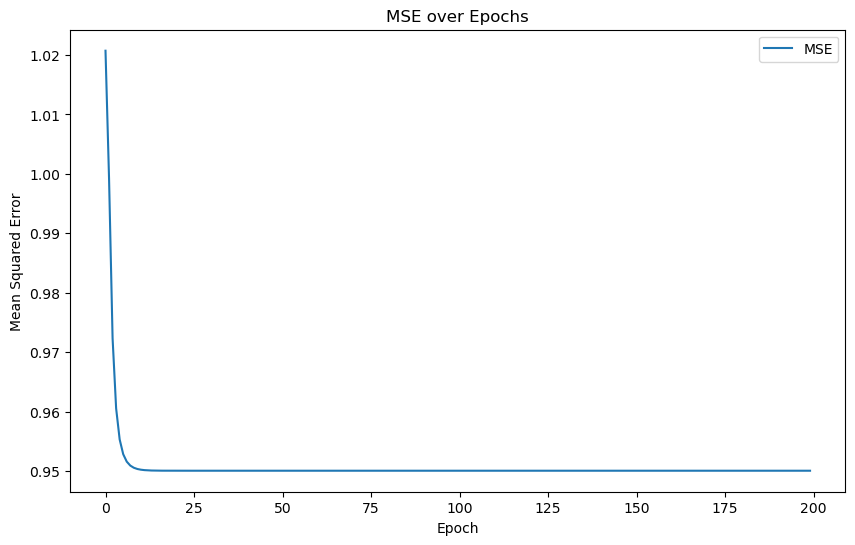

In [177]:
model = AdalineLMS(feature, label);
model.train();

In [117]:
initializer = TruncatedNormal(mean = 1.0, stddev = 0.2)(shape = (1, 2)).numpy();
initializer[0][0], type(initializer[0][1].item())

(1.1014485, float)

In [8]:
# Hyperparameters
learning_rate = 1e-1;
epochs = 200;

X_bias = numpy.c_[numpy.ones(feature.shape[0]), feature];
weights = numpy.random.default_rng().random(feature.shape[1]);

In [4]:
for i in weights:
    print(i)

0.2603155165490756
0.9804277369809457


In [9]:
X_bias, X_bias.T

(array([[1.  , 0.08, 0.72],
        [1.  , 0.26, 0.58],
        [1.  , 0.45, 0.15],
        [1.  , 0.6 , 0.3 ],
        [1.  , 0.1 , 1.  ],
        [1.  , 0.35, 0.95],
        [1.  , 0.7 , 0.65],
        [1.  , 0.92, 0.45]]),
 array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
        [0.08, 0.26, 0.45, 0.6 , 0.1 , 0.35, 0.7 , 0.92],
        [0.72, 0.58, 0.15, 0.3 , 1.  , 0.95, 0.65, 0.45]]))

In [29]:
# Function to calculate net input
def net_input(X, weights):
    return numpy.dot(X, weights)

def net_input_without_style(X, weights):
    lala = [];

    for i in X:
        y_pred = (i[0] * weights[0]) + (i[1] * weights[1]);
        lala.append(y_pred);

    return lala;

# Function to calculate MSE
def mean_squared_error(y_true, y_pred):
    return numpy.mean((y_true - y_pred) ** 2)

In [28]:
for i in net_input(feature,weights):
    print(i)

0.6445494157414892
0.6707644782558839
0.47008911165642897
0.7076957732826603
0.8865970607509498
1.0398772902390703
1.0683759420520356
1.0770424899260038


In [25]:
weights

array([0.7749415 , 0.80910291])

In [30]:
for i in net_input_without_style(feature, weights):
    print(i);

0.6445494157414892
0.6707644782558839
0.47008911165642897
0.7076957732826603
0.8865970607509498
1.0398772902390703
1.0683759420520356
1.0770424899260038


In [5]:
# Training ADALINE
mse_history = []
for epoch in range(epochs):
    output = net_input(X_bias, weights)
    errors = y - output
    weights += learning_rate * np.dot(X_bias.T, errors)
    mse = mean_squared_error(y, output)
    mse_history.append(mse)

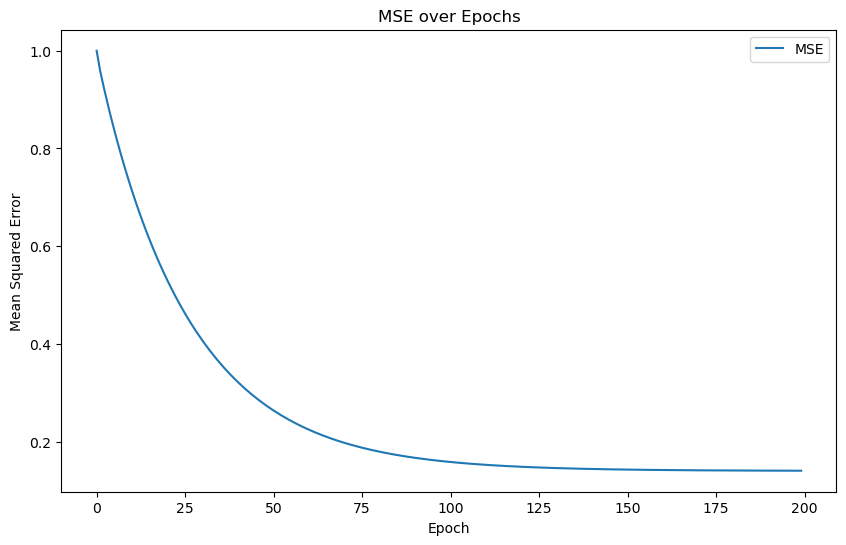

In [6]:
# Plotting MSE curve
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), mse_history, label='MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE over Epochs')
plt.legend()
plt.show()

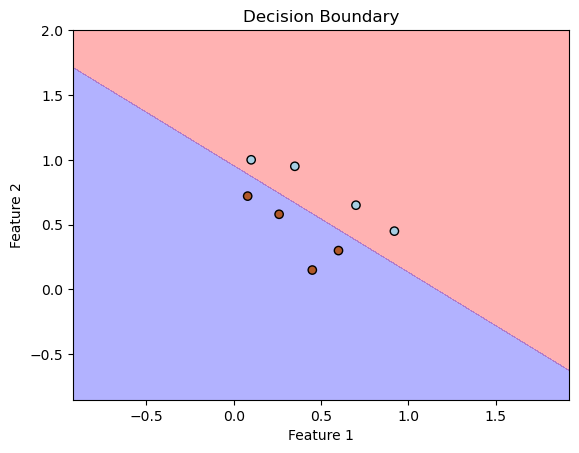

Final weights (including bias): [ 3.45844942 -2.97807657 -3.62045118]


In [7]:
# Plotting decision boundary
def plot_decision_boundary(X, y, weights):
    min_x1, max_x1 = X[:, 0].min() - 1, X[:, 0].max() + 1;
    min_x2, max_x2 = X[:, 1].min() - 1, X[:, 1].max() + 1;
    x1, x2 = np.meshgrid(np.linspace(min_x1, max_x1, 200), np.linspace(min_x2, max_x2, 200));
    Z = net_input(np.c_[np.ones(x1.ravel().shape), x1.ravel(), x2.ravel()], weights).reshape(x1.shape)
    plt.contourf(x1, x2, Z, levels=[-float('inf'), 0, float('inf')], alpha=0.3, colors=['red', 'blue'])
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(X, y, weights)

# Final weights
print("Final weights (including bias):", weights)